In [ ]:
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans, AgglomerativeClustering, HDBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.metrics.cluster import pair_confusion_matrix
import matplotlib.pyplot as plt



In [ ]:
X, y = make_classification(n_samples=100, n_features=300, n_classes=3, n_informative=10,  random_state=42)

In [ ]:
X[:10]

array([[ 1.81521006,  1.17287074,  1.6355003 , ...,  0.68766262,
         0.41491486, -1.61787285],
       [ 0.58602374, -1.17830861,  1.38078579, ...,  0.1311622 ,
         0.01800883, -1.23140878],
       [ 0.485139  , -0.70229091, -1.58540064, ...,  2.76649749,
         1.33742625, -0.91599787],
       ...,
       [-0.70957229,  0.92124768,  1.17617511, ...,  0.00796428,
        -0.28468304,  0.63978733],
       [-0.58348796,  0.53665321, -0.47499369, ...,  2.73968214,
         0.35163757, -1.32045777],
       [-1.57188543, -0.66796939,  0.56437334, ..., -0.12224771,
         0.13130942, -0.55834601]])

In [ ]:
silhouette_scores = []
davies_bouldin_scores = []
calinski_harabasz_scores = []
distortions = []
for i in range(2, 11):
  kmeans = KMeans(n_clusters=i, random_state=0, n_init="auto").fit(X)
  print(kmeans.n_features_in_)
  #hdbscan = HDBSCAN(min_cluster_size=5).fit(X)
  ss = silhouette_score(X, kmeans.labels_)
  silhouette_scores.append(ss)
  dbs = davies_bouldin_score(X, kmeans.labels_)
  davies_bouldin_scores.append(dbs)
  chs = calinski_harabasz_score(X, kmeans.labels_)
  calinski_harabasz_scores.append(chs)
  distortions.append(kmeans.inertia_)
  print(kmeans.inertia_, ss, dbs, chs)
  print(pair_confusion_matrix(y, kmeans.labels_))


300
33365.675979575164 0.010870650696809196 4.53697624537048 1.62492269875072
[[1210 5456]
 [ 590 2644]]
300
32831.849841617186 0.00027787638367926895 5.749710008834973 1.6058271021143586
[[3396 3270]
 [1660 1574]]
300
31885.626794378953 0.009310536740758418 4.775056788342259 2.0405735910231293
[[4506 2160]
 [2188 1046]]
300
31502.834748109253 0.003547906638043305 4.666016113994941 1.8214778915239334
[[4796 1870]
 [2332  902]]
300
31115.374150808715 0.0006798271627364176 4.4109679097320305 1.6939027673567373
[[5178 1488]
 [2492  742]]
300
30578.569715584956 0.002572989531015569 3.9423363163794654 1.6931867338224367
[[5244 1422]
 [2580  654]]
300
30119.078689817678 -0.005947493759572535 4.014757810675246 1.6581052074434288
[[5682  984]
 [2612  622]]
300
29798.194050967162 -0.007124575847080816 3.889949607619867 1.5730184926362354
[[5778  888]
 [2634  600]]
300
29396.96388114178 -0.007942874936478201 3.6629582422708418 1.538234758044239
[[5830  836]
 [2664  570]]


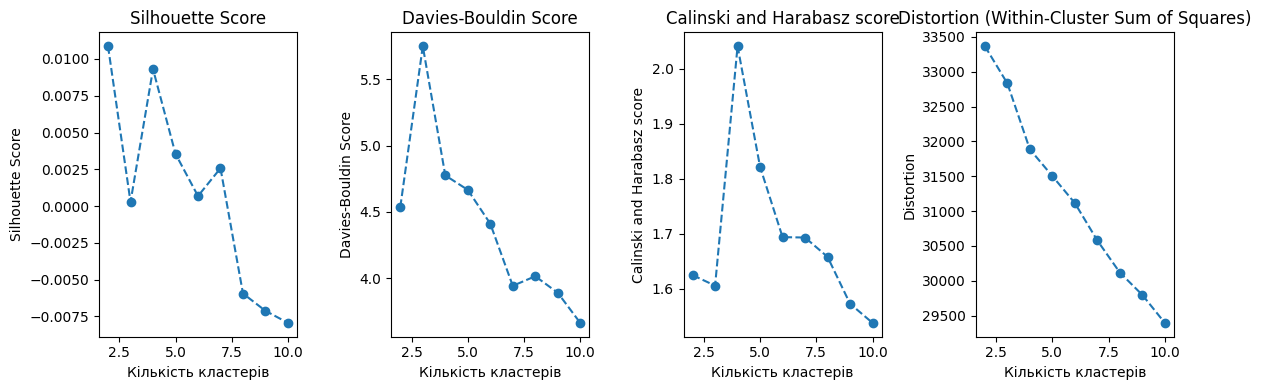

In [ ]:
# Побудова графіків для метрик
plt.figure(figsize=(12, 4))
plt.subplot(1, 4, 1)
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Кількість кластерів')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')

plt.subplot(1, 4, 2)
plt.plot(range(2, 11), davies_bouldin_scores, marker='o', linestyle='--')
plt.xlabel('Кількість кластерів')
plt.ylabel('Davies-Bouldin Score')
plt.title('Davies-Bouldin Score')

plt.subplot(1, 4, 3)
plt.plot(range(2, 11), calinski_harabasz_scores, marker='o', linestyle='--')
plt.xlabel('Кількість кластерів')
plt.ylabel('Calinski and Harabasz score')
plt.title('Calinski and Harabasz score')

plt.subplot(1, 4, 4)
plt.plot(range(2, 11), distortions, marker='o', linestyle='--')
plt.xlabel('Кількість кластерів')
plt.ylabel('Distortion')
plt.title('Distortion (Within-Cluster Sum of Squares)')

plt.tight_layout()
plt.show()


In [ ]:
kmeans.labels_

array([5, 3, 6, 6, 6, 5, 6, 7, 8, 5, 4, 3, 6, 9, 6, 6, 8, 2, 1, 7, 5, 6,
       1, 3, 6, 3, 1, 7, 6, 7, 7, 1, 4, 7, 2, 6, 2, 9, 1, 3, 2, 6, 6, 8,
       0, 1, 6, 1, 3, 2, 8, 6, 1, 6, 7, 8, 4, 4, 1, 4, 3, 3, 6, 1, 7, 5,
       5, 6, 7, 1, 3, 6, 6, 7, 7, 7, 7, 6, 6, 5, 3, 7, 6, 5, 1, 3, 1, 6,
       6, 1, 8, 5, 7, 1, 7, 5, 1, 8, 7, 2], dtype=int32)

In [ ]:
kmeans.cluster_centers_

array([[ 0.68195388,  0.56747863,  0.45312311, ..., -0.52367469,
        -0.28507574,  0.11143233],
       [-0.02150029,  0.10556002, -0.12587141, ...,  0.14429744,
         0.35821839,  0.02729577],
       [-1.03303429,  0.1359644 , -0.9011674 , ...,  0.83914111,
         0.77866712, -0.47995319],
       ...,
       [ 0.25230098,  0.33202223,  0.43490575, ...,  0.07603777,
        -0.06202669, -0.03739546],
       [ 0.37028805, -0.36012741,  0.45031662, ...,  0.8340527 ,
         0.17957801, -0.02716882],
       [-0.82249208, -0.55921957,  0.48986275, ..., -0.05144255,
         0.55788704,  0.95379717]])